# Twitter Sentiment Analysis

## Import Libraries

In [52]:
# Standard library
import datetime as dt
import time
import string

# To access the Twitter API
import tweepy

# To clean & process the data
from textblob import TextBlob
import re

# Data manipulation and display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display options
pd.set_option('display.max_rows', 500)

## Load Data

In [11]:
# Load all csvs available into dataframes
df_list = []

start_date = dt.date(2021, 1, 1)
end_date = dt.date(2021, 4, 22)
delta = dt.timedelta(days = 1)

while start_date <= end_date:
    print(start_date.strftime('%Y-%m-%d'))
    df_list.append(pd.read_csv('DogecoinTweets/dogecoin-sentiment-' + start_date.strftime('%Y-%m-%d') + '.csv'))
    start_date += delta

2021-01-02
2021-01-03
2021-01-04
2021-01-05
2021-01-06
2021-01-07
2021-01-08
2021-01-09
2021-01-10
2021-01-11
2021-01-12
2021-01-13
2021-01-14
2021-01-15
2021-01-16
2021-01-17
2021-01-18
2021-01-19
2021-01-20
2021-01-21
2021-01-22
2021-01-23
2021-01-24
2021-01-25
2021-01-26
2021-01-27
2021-01-28
2021-01-29
2021-01-30
2021-01-31
2021-02-01
2021-02-02
2021-02-03
2021-02-04
2021-02-05
2021-02-06
2021-02-07
2021-02-08
2021-02-09
2021-02-10
2021-02-11
2021-02-12
2021-02-13
2021-02-14
2021-02-15
2021-02-16
2021-02-17
2021-02-18
2021-02-19
2021-02-20
2021-02-21
2021-02-22
2021-02-23
2021-02-24
2021-02-25
2021-02-26
2021-02-27
2021-02-28
2021-03-01
2021-03-02
2021-03-03
2021-03-04
2021-03-05
2021-03-06
2021-03-07
2021-03-08
2021-03-09
2021-03-10
2021-03-11
2021-03-12
2021-03-13
2021-03-14
2021-03-15
2021-03-16
2021-03-17
2021-03-18
2021-03-19
2021-03-20
2021-03-21
2021-03-22
2021-03-23
2021-03-24
2021-03-25
2021-03-26
2021-03-27
2021-03-28
2021-03-29
2021-03-30
2021-03-31
2021-04-01
2021-04-02

In [187]:
# # Remove irrelevant columns
# to_keep = ['created_at',
#            'id',
#            'full_text',
#            'source',
#            'geo',
#            'coordinates',
#            'place',
#            'retweet_count',
#            'favorite_count',
#            'user.location',
#            'user.followers_count'
#           ]

# df_tweet_trunc = df_tweet.drop(columns=[col for col in df_tweet if col not in to_keep])
# print(df_tweet_trunc)

Empty DataFrame
Columns: []
Index: []


## Clean Text

In [19]:
# Remove URLs
def clean_url(df):
    df['text'] = df.text.map(lambda x : " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x).split()))

# Wrapper for any cleaning functions that need to be done
def clean(df):
    clean_url(df)

for df_uncleaned in df_list:
    clean(df_uncleaned)

## Sentiment and Polarity Analysis

In [21]:
def generate_sentiments(df_tweet_clean):
    # Add empty columns to populate
    df_tweet_clean['polarity'] = 0
    df_tweet_clean['subjectivity'] = 0

    df_tweet_clean['polarity'] = df_tweet_clean['text'].apply(lambda x: TextBlob(x).sentiment[0])
    df_tweet_clean['subjectivity'] = df_tweet_clean['text'].apply(lambda x: TextBlob(x).sentiment[1])

for df_cleaned in df_list:
    generate_sentiments(df_cleaned)


In [41]:
date_list = []
polarity_list = []
subjectivity_list = []

start_date = dt.date(2021, 1, 1)

for df_cleaned in df_list:
    date_list.append(start_date.strftime('%Y-%m-%d'))
    polarity_list.append(df_cleaned.polarity.mean())
    subjectivity_list.append(df_cleaned.subjectivity.mean())
    start_date += delta

df_sentiment = pd.DataFrame({'date':date_list, 'polarity':polarity_list, 'subjectivity':subjectivity_list})
# df_sentiment.assign(polarity=polarity_list)
# df_sentiment.assign(subjectivity=subjectivity_list)

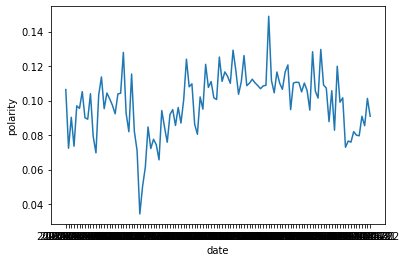

In [44]:
sns.lineplot(x='date', y='polarity', data=df_sentiment)

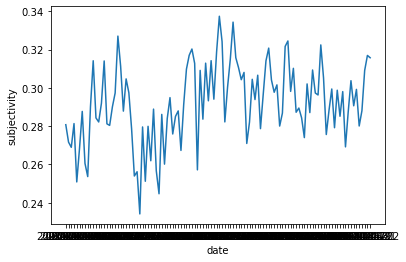

In [45]:
sns.lineplot(x='date', y='subjectivity', data=df_sentiment)

## Hashtag Analysis

In [58]:
def extract_hashtags(text):
    text_lowercase = text.lower()
    # May return hashtags if part of a URL, but URLs should be removed already
    return set(part[1:] for part in text_lowercase.split() if part.startswith('#'))

def get_hashtag_counts(df):
    hashtag_dict = {}
    for i, row in df.iterrows():
        tags = extract_hashtags(row.text)
        for tag in tags:
            # Remove punctuation
            tag = tag.translate(str.maketrans('', '', string.punctuation))
            
            # Add to dictionary or increase count if already added
            if tag in hashtag_dict.keys():
                hashtag_dict[tag] += 1
            else:
                hashtag_dict[tag] = 1
    return hashtag_dict

all_hashtags = []
for df in df_list:
    all_hashtags.append(get_hashtag_counts(df))

In [60]:
start_date = dt.date(2021, 1, 1)
for hashtag_dict in all_hashtags:
    print(start_date.strftime('%Y-%m-%d'))
    sorted_list = sorted(hashtag_dict.items(), key=lambda kv: kv[1], reverse=True)
    for i in range(10):
        print('  ' + str(sorted_list[i]))
    start_date += delta

2021-01-01
  ('dogecoin', 188)
  ('doge', 34)
  ('bitcoin', 21)
  ('cryptocurrency', 14)
  ('crypto', 11)
  ('btc', 8)
  ('robinhood', 4)
  ('teamwork', 4)
  ('elonmusk', 4)
  ('stockmarket', 4)
2021-01-02
  ('dogecoin', 1407)
  ('bitcoin', 86)
  ('doge', 83)
  ('dogecointo1dollar', 54)
  ('crypto', 34)
  ('cryptocurrency', 31)
  ('btc', 30)
  ('dogearmy', 19)
  ('elonmusk', 18)
  ('investing', 18)
2021-01-03
  ('dogecoin', 1548)
  ('doge', 205)
  ('bitcoin', 146)
  ('dogecointo1dollar', 140)
  ('dogearmy', 105)
  ('dgc', 81)
  ('crypto', 78)
  ('dogecoin2021', 57)
  ('btc', 55)
  ('cryptocurrency', 50)
2021-01-04
  ('dogecoin', 1570)
  ('doge', 263)
  ('dogecointo1dollar', 206)
  ('dogearmy', 162)
  ('bitcoin', 125)
  ('crypto', 90)
  ('cryptocurrency', 65)
  ('dogecoin2021', 53)
  ('dgc', 51)
  ('dogecoins', 42)
2021-01-05
  ('dogecoin', 1033)
  ('doge', 189)
  ('dogecointo1dollar', 109)
  ('dogearmy', 94)
  ('bitcoin', 83)
  ('crypto', 52)
  ('cryptocurrency', 46)
  ('btc', 33)
  ('

In [81]:
def chart_tag(target_tag, df_source_list, tag_dict_list):
    start_date = dt.date(2021, 1, 1)
    i = 0
    tag_ratio_df = pd.DataFrame(columns=['date', 'ratio'])
    for tag_dict in tag_dict_list:
        total_tweets = df_source_list[i].shape[0]
        target_tag_count = None
        if target_tag in tag_dict.keys():
            target_tag_count = tag_dict[target_tag]
        else:
            target_tag_count = 0
        target_tag_ratio = float(target_tag_count) / float(total_tweets)
        tag_ratio_df.loc[i] = [start_date, target_tag_ratio]
        i += 1
#         print(start_date.strftime('%Y-%m-%d'))
        start_date += delta
    return tag_ratio_df

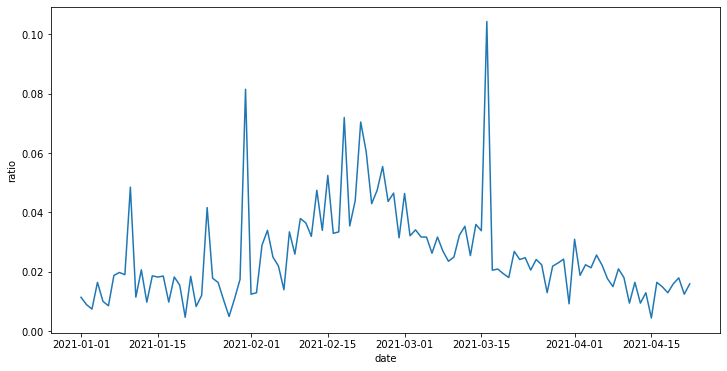

In [93]:
df_target_tag = chart_tag('elonmusk', df_list, all_hashtags)
df_target_tag
fig, ax = plt.subplots(figsize = (12,6))    
fig = sns.lineplot(x = 'date', y = 'ratio', data = df_target_tag, 
                  estimator = sum, ci = None, ax=ax)

# x_dates = df_target_tag['date'].sort_values().unique()
# ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')

In [87]:
df_target_tag

,date,ratio
0,2021-01-01,0.000000
1,2021-01-02,0.000000
2,2021-01-03,0.000000
3,2021-01-04,0.000000
4,2021-01-05,0.000000
5,2021-01-06,0.000000
6,2021-01-07,0.000000
7,2021-01-08,0.000000
8,2021-01-09,0.000000
9,2021-01-10,0.000000


## At Analysis

In [94]:
def extract_ats(text):
    text_lowercase = text.lower()
    # May return hashtags if part of a URL, but URLs should be removed already
    return set(part[1:] for part in text_lowercase.split() if part.startswith('@'))

def get_at_counts(df):
    at_dict = {}
    for i, row in df.iterrows():
        tags = extract_ats(row.text)
        for tag in tags:
            # Remove punctuation
            tag = tag.translate(str.maketrans('', '', string.punctuation))
            
            # Add to dictionary or increase count if already added
            if tag in at_dict.keys():
                at_dict[tag] += 1
            else:
                at_dict[tag] = 1
    return at_dict

all_ats = []
for df in df_list:
    all_ats.append(get_at_counts(df))

In [95]:
start_date = dt.date(2021, 1, 1)
for at_dict in all_ats:
    print(start_date.strftime('%Y-%m-%d'))
    sorted_list = sorted(at_dict.items(), key=lambda kv: kv[1], reverse=True)
    for i in range(10):
        print('  ' + str(sorted_list[i]))
    start_date += delta

2021-01-01
  ('elonmusk', 39)
  ('dogecoin', 19)
  ('coinbase', 4)
  ('paypal', 3)
  ('tesla', 2)
  ('robinhoodapp', 2)
  ('madmoneyoncnbc', 2)
  ('dogecoinvalue', 1)
  ('botofdogecoin', 1)
  ('coinbasepro', 1)
2021-01-02
  ('elonmusk', 125)
  ('dogecoin', 41)
  ('robinhoodapp', 7)
  ('tesla', 6)
  ('coinbase', 4)
  ('paypal', 2)
  ('chamath', 2)
  ('jeffbezos', 2)
  ('bitcoin', 2)
  ('spacex', 2)
2021-01-03
  ('elonmusk', 120)
  ('dogecoin', 63)
  ('coinbase', 8)
  ('tesla', 7)
  ('', 5)
  ('bitcoin', 5)
  ('yearofdoge', 4)
  ('loganpaul', 3)
  ('angelawhite', 3)
  ('dogecoinvalue', 3)
2021-01-04
  ('elonmusk', 85)
  ('dogecoin', 28)
  ('mrbeastyt', 12)
  ('robinhoodapp', 8)
  ('tesla', 8)
  ('hireztherapper', 7)
  ('angelawhite', 5)
  ('realdonaldtrump', 3)
  ('kevinhart4real', 2)
  ('joebiden', 2)
2021-01-05
  ('elonmusk', 77)
  ('dogecoin', 35)
  ('hireztherapper', 9)
  ('mrbeastyt', 9)
  ('tesla', 7)
  ('angelawhite', 5)
  ('robinhoodapp', 5)
  ('kanyewest', 5)
  ('', 4)
  ('reald

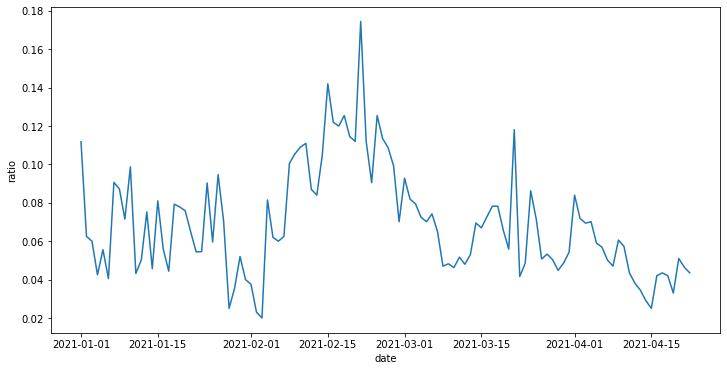

In [98]:
df_target_tag = chart_tag('elonmusk', df_list, all_ats)
df_target_tag
fig, ax = plt.subplots(figsize = (12,6))    
fig = sns.lineplot(x = 'date', y = 'ratio', data = df_target_tag, 
                  estimator = sum, ci = None, ax=ax)